In [23]:
# imports
import gzip
import math
import random
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [5]:
# reading in first 500,000 entries of DS
file = 'beer.json.gz'
def readData(path):
    x = gzip.open(path)
    for l in x:
        yield eval(l)

dataset = []
count = 0
for l in readData(file):
    dataset.append(l)
    count = count + 1
    if count > 500000:
        break

In [32]:
dataset[0]

{'review/appearance': 2.5,
 'beer/style': 'Hefeweizen',
 'review/palate': 1.5,
 'review/taste': 1.5,
 'beer/name': 'Sausa Weizen',
 'review/timeUnix': 1234817823,
 'beer/ABV': 5.0,
 'beer/beerId': '47986',
 'beer/brewerId': '10325',
 'review/timeStruct': {'isdst': 0,
  'mday': 16,
  'hour': 20,
  'min': 57,
  'sec': 3,
  'mon': 2,
  'year': 2009,
  'yday': 47,
  'wday': 0},
 'review/overall': 1.5,
 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.',
 'user/profileName': 'stcules',
 'review/aroma': 2.0}

In [24]:
# dont run again
rating = defaultdict(int)
num_words = []
for d in dataset:
    rating[d["review/overall"]] += 1
    num_words.append(len(word_tokenize(d['review/text'])))

Text(0, 0.5, 'Number of Occurrences')

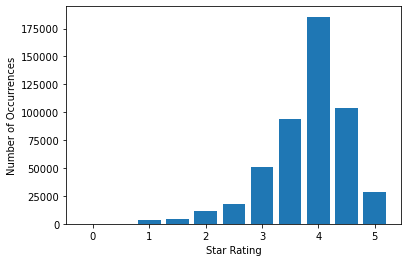

In [22]:
# distibution of star rating
#plt.hist(rating)
plt.bar(rating.keys(), rating.values(), width = 0.4)
plt.xlabel("Star Rating")
plt.ylabel("Number of Occurrences")

In [29]:
# average number of words per review
np.mean(np.array(num_words))

144.95949608100784

In [36]:
# number of reviews per user
users = defaultdict(int)
# number of unique beers per brewery
brewery = defaultdict(list)
for d in dataset:
    users[d['user/profileName']] += 1
    if d['beer/beerId'] not in brewery[d['beer/brewerId']]:
        brewery[d['beer/brewerId']].append(d['beer/beerId'])

In [40]:
# users with mosty reviews
userS = pd.Series(users)
userS.sort_values()

punzak                 1
MikeMilanoDesign       1
zeravat                1
1844original           1
davek                  1
                    ... 
ChainGangGuy        1111
womencantsail       1202
BuckeyeNation       1224
mikesgroove         1352
northyorksammy      1765
Length: 22374, dtype: int64

In [86]:
# stats about users
unique_U = len(userS)
avg_num_rev = userS.mean()
med_num_rev = userS.median()
num_users_5 = len(userS[userS<=5])
num_users_6 = len(userS[userS>5])
unique_U
avg_num_rev
med_num_rev
num_users_5
num_users_6

8259

In [124]:
# number of reviews by users with more than 5 reviews
sum(userS[userS>5])
#sum(userS[userS<=5])

473031

In [87]:
userS.sum()

500001

Text(0, 0.5, 'Number of Occurrences in Log Scale')

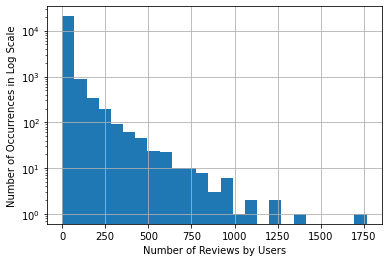

In [76]:
# distibution of users by number of reviews
plt.yscale("log") 
userS.hist(bins = 25)
plt.xlabel("Number of Reviews by Users")
plt.ylabel("Number of Occurrences in Log Scale")

In [90]:
# number of unique breweries
brew_num = len(brewery)
brew_num

1710

In [96]:
# number of unique beers per brewery
unique_b = [len(brewery[b]) for b in brewery]
unique_b

[4,
 28,
 5,
 16,
 2,
 6,
 11,
 4,
 2,
 9,
 1,
 29,
 50,
 42,
 1,
 10,
 7,
 3,
 4,
 17,
 6,
 3,
 2,
 1,
 1,
 6,
 8,
 2,
 3,
 1,
 5,
 3,
 1,
 9,
 11,
 3,
 1,
 5,
 3,
 20,
 1,
 12,
 2,
 1,
 22,
 1,
 3,
 2,
 12,
 10,
 14,
 1,
 1,
 5,
 1,
 25,
 4,
 21,
 8,
 15,
 4,
 26,
 23,
 2,
 2,
 4,
 6,
 17,
 2,
 17,
 2,
 16,
 1,
 3,
 1,
 4,
 4,
 5,
 5,
 75,
 9,
 1,
 3,
 19,
 5,
 41,
 1,
 1,
 90,
 24,
 7,
 6,
 10,
 4,
 1,
 8,
 9,
 28,
 2,
 15,
 19,
 10,
 1,
 17,
 76,
 7,
 14,
 2,
 5,
 4,
 8,
 16,
 1,
 7,
 1,
 21,
 15,
 10,
 4,
 1,
 4,
 2,
 3,
 6,
 7,
 6,
 3,
 18,
 1,
 3,
 5,
 3,
 22,
 5,
 13,
 3,
 5,
 6,
 6,
 7,
 8,
 2,
 1,
 4,
 70,
 64,
 3,
 4,
 29,
 5,
 3,
 2,
 10,
 2,
 26,
 2,
 1,
 1,
 140,
 147,
 1,
 31,
 5,
 10,
 1,
 1,
 34,
 3,
 11,
 1,
 11,
 4,
 1,
 3,
 6,
 2,
 9,
 1,
 2,
 21,
 25,
 7,
 3,
 2,
 7,
 1,
 5,
 15,
 5,
 1,
 3,
 9,
 2,
 6,
 8,
 1,
 15,
 1,
 10,
 1,
 14,
 8,
 2,
 8,
 10,
 20,
 5,
 3,
 2,
 11,
 1,
 4,
 4,
 4,
 3,
 17,
 1,
 1,
 29,
 8,
 4,
 8,
 2,
 13,
 6,
 1,
 4,
 1,
 31,
 17,
 18,
 2,


In [105]:
# stats about number of unqiue beers per brewery
mean_b = np.mean(unique_b)
med_b = np.median(unique_b)
last_b = np.sort(unique_b)[-10:]

array([103, 133, 140, 140, 147, 155, 201, 283, 312, 394])

In [112]:
# series of unique beers per brewery
unique_beers = {b : len(brewery[b]) for b in brewery}
breweryS = pd.Series(unique_beers)

Text(0, 0.5, 'Number of Occurrences in Log Scale')

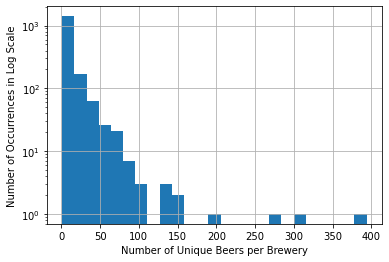

In [114]:
# plot of number of unique beers per brewery
plt.yscale("log") 
breweryS.hist(bins = 25)
plt.xlabel("Number of Unique Beers per Brewery")
plt.ylabel("Number of Occurrences in Log Scale")

In [117]:
# unique beers per brewery
breweryS.sort_values()

18856      1
1692       1
12334      1
27032      1
5952       1
        ... 
16866    155
17981    201
5318     283
1177     312
1548     394
Length: 1710, dtype: int64

In [118]:
num_b_5 = len(breweryS[breweryS<=5])
num_b_6 = len(breweryS[breweryS>5])
num_b_5

889

In [129]:
more_5 = breweryS[breweryS>5]
more_5.index

Index(['1075', '2724', '12770', '163', '11715', '1463', '1454', '850', '577',
       '14756',
       ...
       '6052', '5469', '2936', '13768', '717', '788', '10049', '9051', '295',
       '132'],
      dtype='object', length=821)

In [130]:
# creation of structure for which beers have more than 5 unqiue beers
brew_more_5 = defaultdict(int)
more_5 = breweryS[breweryS>5]
for d in dataset:
    if d['beer/brewerId'] in more_5.index:
        brew_more_5[d['beer/brewerId']] += 1

In [132]:
# number of reviews for breweries with more than 5 unique beers
num = 0
for x in brew_more_5:
    num = num + brew_more_5[x]
num

474937